- time: timestamp of incoming report/record, in the format YYYY-MM-DD hh:mm:ss
- location: id of neighborhood where person reporting is feeling the shaking and/or seeing the damage
- {shake_intensity, sewer_and_water, power, roads_and_bridges, medical, buildings}: reported categorical value of how violent the shaking was/how bad the damage was (0 - lowest, 10 - highest; missing data allowed)

Also included are two shakemap (PNG) files which indicate where the corresponding earthquakes' epicenters originate as well as how much shaking can be felt across the city.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(color_codes=True)

df = pd.read_csv('MC1/mc1-reports-data.csv')

Text(0.5, 1.0, 'Missing values')

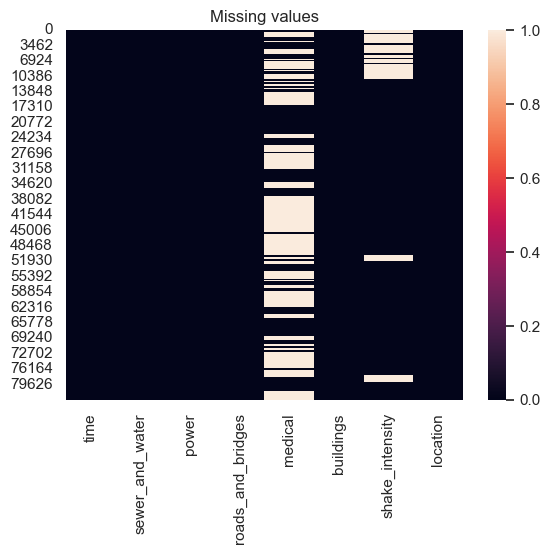

In [2]:
# Missing values in the dataset
sns.heatmap(df.isnull()).set_title("Missing values")

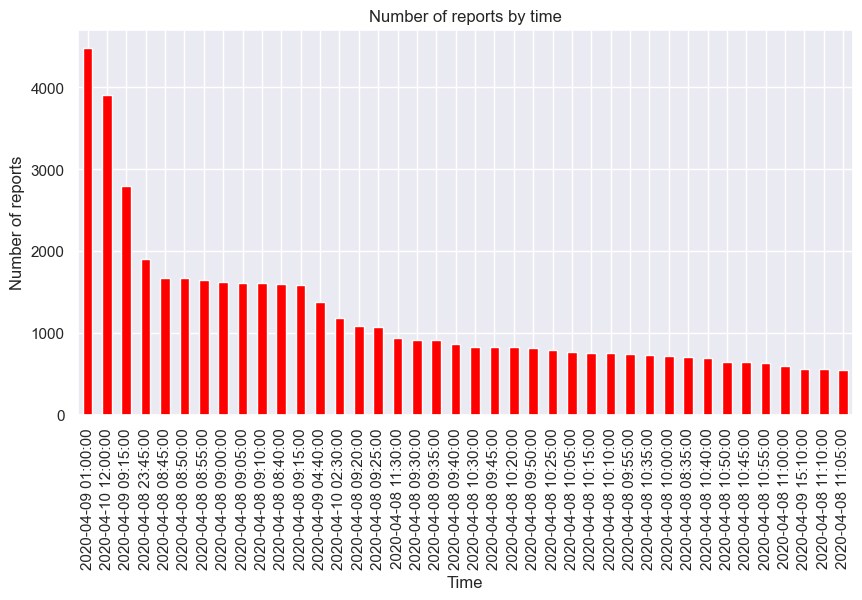

In [5]:
# Plotting a Histogram - Count of Reports with time
df.time.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5), color='red')
plt.title('Number of reports by time')
plt.ylabel('Number of reports')
plt.xlabel('Time');


<Axes: xlabel='time', ylabel='location'>

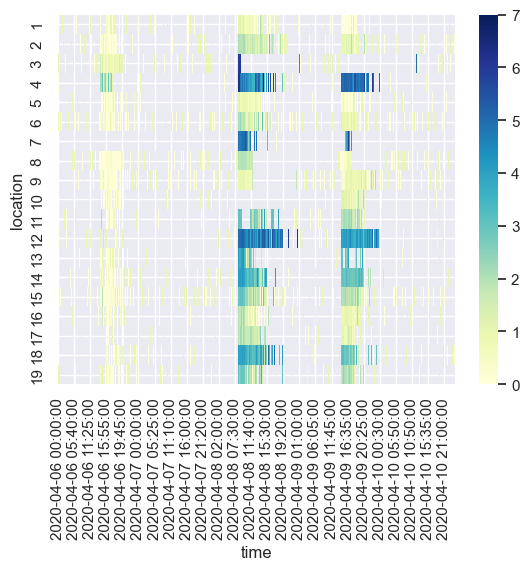

In [35]:
# Heatmap of the shake intensity by location
sns.set()
pivot = df.pivot_table(index='location', columns='time', values='shake_intensity')
sns.heatmap(pivot, cmap="YlGnBu")